In [ ]:
#  Car Price Prediction with Machine Learning (Upgraded for 1st Prize)

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:

#  Load Dataset
df = pd.read_csv("car data.csv")


In [5]:
#  Initial Exploration
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [6]:
print("\nNull Value Check:")
print(df.isnull().sum())



Null Value Check:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [7]:
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [8]:

#  Feature Engineering
df['Car_Age'] = 2025 - df['Year']  # Assuming current year = 2025
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)


In [9]:

# Encode Categorical Features
le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    df[col] = le.fit_transform(df[col])


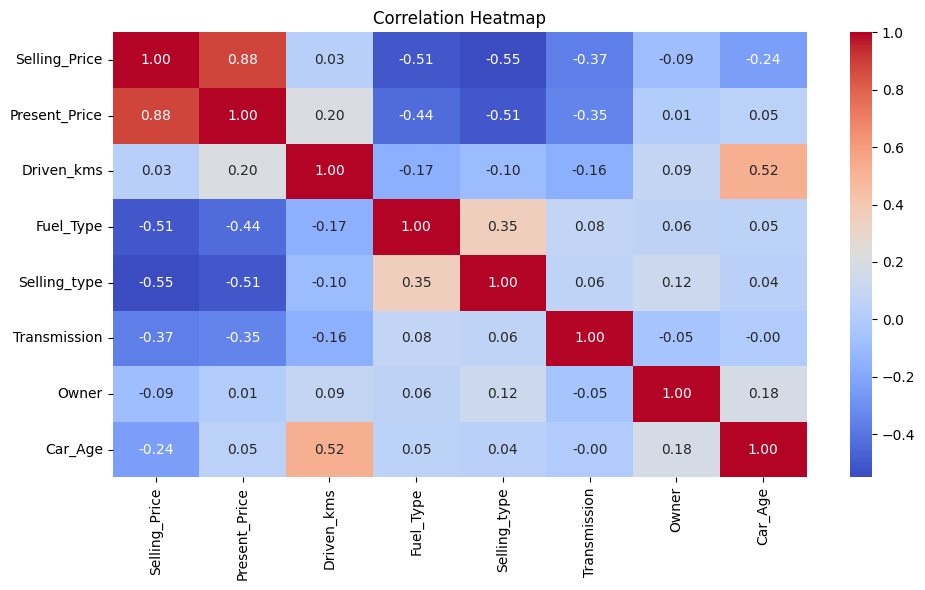

In [11]:

#  Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [12]:

#  Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [ ]:

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

#  Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"📊 Random Forest - R² Score: {r2_rf:.3f}")
print(f"📉 Random Forest - RMSE: {rmse_rf:.3f}")


📊 Random Forest - R² Score: 0.959
📉 Random Forest - RMSE: 0.969


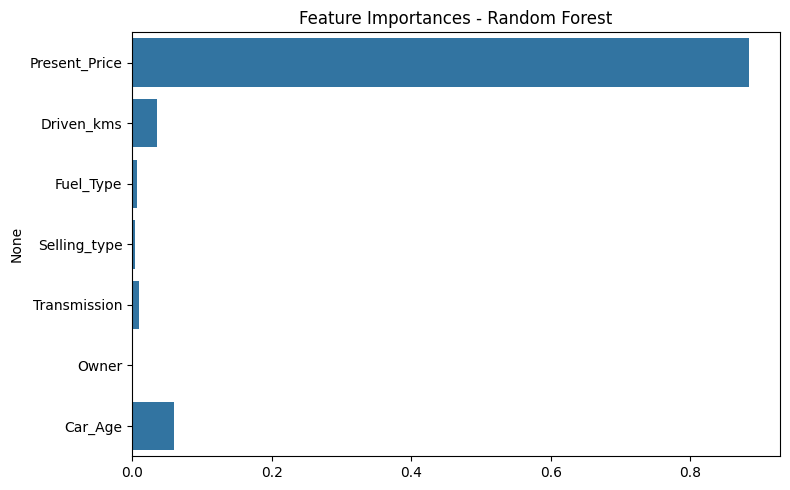

In [15]:

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [16]:

#  Model 2: Linear Regression (for comparison)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"📊 Linear Regression - R² Score: {r2_lr:.3f}")
print(f"📉 Linear Regression - RMSE: {rmse_lr:.3f}")


📊 Linear Regression - R² Score: 0.847
📉 Linear Regression - RMSE: 1.879


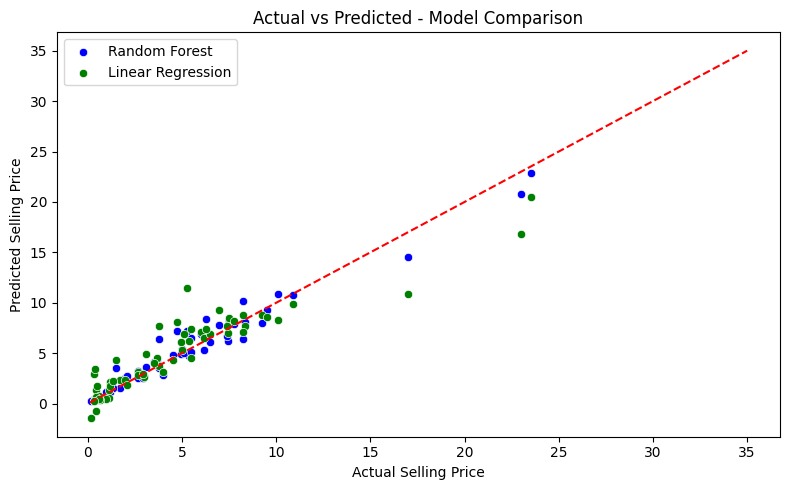

In [17]:

#  Actual vs Predicted Comparison
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', color='blue')
sns.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted - Model Comparison")
plt.legend()
plt.tight_layout()
plt.show()